# Creating a dataset to train the model to recognize whether the voice belongs to a person or not


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
validate = pd.read_csv('../data/validated.tsv',  sep='\t')

In [5]:
sample_count = validate['client_id'].value_counts()

In [6]:
validate['client_id'].nunique()

422

In [7]:
bins = [0, 10, 20, 50, 100, 200, 300, 400, 500 ] + [float('inf')]

<BarContainer object of 9 artists>

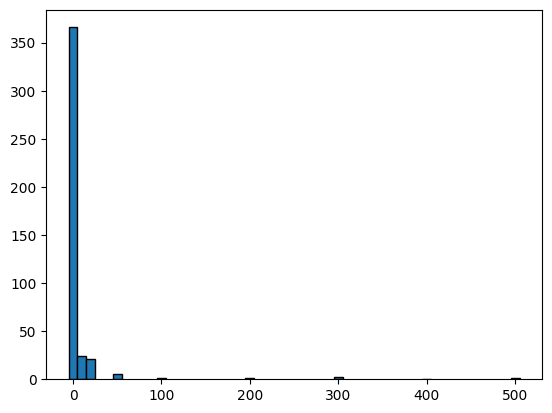

In [28]:
hist, edges = np.histogram([e for e in sample_count], bins=bins)

plt.bar(edges[:-1], hist, width=10, edgecolor='black')

In [8]:
valid_client_ids = [e for e in sample_count[sample_count < 500][sample_count > 5].index]

In [9]:
clean_data = validate[validate['client_id'].isin(valid_client_ids)][['client_id', 'path']]

In [12]:
def concatenation(train_data: pd.DataFrame, anchor: pd.DataFrame, posneg: pd.DataFrame) -> pd.DataFrame:
		data_particle_case = pd.DataFrame(columns=['anchor_client_id', 'anchor_path', 'posneg_client_id', 'posneg_path', 'anchor_source', 'posneg_source'])
		data_particle_case[['anchor_client_id', 'anchor_path', 'anchor_source']] = anchor
		data_particle_case[['posneg_client_id', 'posneg_path', 'posneg_source']] = posneg
		
		return pd.concat([train_data, data_particle_case], ignore_index=True)

def data_generation(data, data_frac=1):
	client_ids = data['client_id'].unique()
	data['source'] = 'original'
	
	res_data = pd.DataFrame(columns=['anchor_client_id', 'anchor_path', 'posneg_client_id', 'posneg_path', 'anchor_source', 'posneg_source'])
	for id in client_ids:
		client_id_sample = data[data['client_id'] == id] 
		no_client_id_sample = data[data['client_id'] != id]

		anchor_original = client_id_sample.sample(frac=data_frac).reset_index(drop=True)
		positive_original = client_id_sample.sample(frac=data_frac).reset_index(drop=True)
		res_data = concatenation(res_data, anchor_original, positive_original)

		anchor_neg_original = client_id_sample.sample(frac=data_frac).reset_index(drop=True)
		negative_generated = no_client_id_sample.sample(frac=data_frac).reset_index(drop=True)
		res_data = concatenation(res_data, anchor_neg_original, negative_generated)

	return res_data

In [16]:
train_base_data = data_generation(clean_data)

In [17]:
save_folder = '../dataset/'
dataset_name = 'train_base_dataset.csv'
save_path = save_folder + dataset_name

In [18]:
train_base_data.to_csv(save_path, index=False)

In [8]:
train_client_ids = [e for e in sample_count[sample_count < 5][sample_count >=2].index]

In [ ]:
test_clean_validated_data = validate[validate['client_id'].isin(train_client_ids)][['client_id', 'path']].sample(n = 100).reset_index(drop=True)

In [9]:
test_clean_validated_data = validate[validate['client_id'].isin(train_client_ids)][['client_id', 'path']]

In [16]:
clean_test_data = data_generation(test_clean_validated_data)

In [17]:
clean_test_data.to_csv('validate_data_test_dataset.csv', index=False)